# Read Files from DWD CDC #

## Read the list of stations providing hourly precipitation measurements # 

Get the file from here:

ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/precipitation/recent/RR_Stundenwerte_Beschreibung_Stationen.txt

Check whether the downloaded file is in your current Jupyter Notebook work directory.

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'nb0501_pandas_DWD_CDC_station_prec_V001.ipynb',
 'NRW.qgs',
 'NRW.qgz',
 'RR_Stundenwerte_Beschreibung_Stationen.txt',
 'station_info_diy.csv',
 'station_into.csv',
 'stundenwerte_RR_00989_akt',
 'stundenwerte_RR_00989_akt.zip',
 'stundenwerte_RR_13670_akt',
 'stundenwerte_RR_13670_akt.zip']

In [2]:
# This converts substrings to meaningful data types, e.g "3.14159" (string) -> 3.14159 (float)
def myparser(r):
    station_id = int(r[0:5].strip())
    from_date = r[5:14].strip()
    to_date = r[14:23].strip()
    altitude = float(r[23:38].strip())
    lat = float(r[38:50].strip())
    lon = float(r[50:61].strip())
    station_name = r[61:102].strip()
    fed_state = r[102:].strip()
    return station_id, station_name, lat, lon, altitude, from_date, to_date, fed_state 

In [3]:
# This just splits the string of fixed format columns
def myparser2(r):
    station_id   =     r[0:5].strip()
    from_date    =    r[5:14].strip()
    to_date      =   r[14:23].strip()
    altitude     =   r[23:38].strip()
    lat          =   r[38:50].strip()
    lon          =   r[50:61].strip()
    station_name =  r[61:102].strip()
    fed_state    = r[102:].strip()
    return station_id, station_name, lat, lon, altitude, from_date, to_date, fed_state 

In [4]:
# read all lines in one go into a list of strings
filename = 'RR_Stundenwerte_Beschreibung_Stationen.txt'
file = open(filename,"r")
rows = file.readlines()
file.close()

In [5]:
# create a list for the output data
# first row contains column names
slist = ["station_id;station_name;lat;lon;altitude;from_date;to_date;fed_state"]
for r in rows[2:]:
    station_id, station_name, lat, lon, altitude, from_date, to_date, fed_state = myparser2(r)
    s = ";".join([station_id, station_name, lat, lon, altitude, from_date, to_date, fed_state])
    # more complex, in case you need quotation marks in the output strings
    #s = station_id + ";'" + station_name + "';" + lat + ";" + lon + ";"  + altitude + ";'" + from_date +"';'" +to_date + "';'" + fed_state + r"'"
    slist.append(s)

In [6]:
slist[0:5]

['station_id;station_name;lat;lon;altitude;from_date;to_date;fed_state',
 '00003;Aachen;50.7827;6.0941;202;19500401;20110401;Nordrhein-Westfalen',
 '00005;Aachen-Merzbrück;50.8167;6.1833;190;19790102;19950630;Nordrhein-Westfalen',
 '00020;Abtsgmünd-Untergröningen;48.9220;9.9129;432;20040813;20190623;Baden-Württemberg',
 '00029;Adelsdorf (Kläranlage);49.7175;10.9101;260;20060110;20190623;Bayern']

In [7]:
outfile = open("station_info_diy.csv","w")
outfile.writelines(slist)
outfile.close()

In [8]:
# add "\n" to the end of each string 
with open('station_into.csv', 'w') as f:
    f.write('\n'.join(slist))
    
# or

#with open('station_into.csv', 'w') as f:
#    f.writelines("%s\n" % l for l in slist)


In [9]:
# Side note: how join works
"---".join(["b","c","d","e"])

'b---c---d---e'

# The Pandas Way #

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html

In [10]:
import pandas as pd

## Read the station info file ##

In [11]:
filename = 'RR_Stundenwerte_Beschreibung_Stationen.txt'
file = open(filename,"r")
r = file.readline()
file.close()
headers = r.split()
headers

['Stations_id',
 'von_datum',
 'bis_datum',
 'Stationshoehe',
 'geoBreite',
 'geoLaenge',
 'Stationsname',
 'Bundesland']

In [12]:
station_df = pd.read_fwf(filename,skiprows=[0,1], names = headers)

In [13]:
station_df.head()

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,3,19500401,20110401,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
1,5,19790102,19950630,190,50.8167,6.1833,Aachen-Merzbrück,Nordrhein-Westfalen
2,20,20040813,20190623,432,48.9220,9.9129,Abtsgmünd-Untergröningen,Baden-Württemberg
3,29,20060110,20190623,260,49.7175,10.9101,Adelsdorf (Kläranlage),Bayern
4,44,19790101,20190623,44,52.9336,8.2370,Großenkneten,Niedersachsen


### Rename columns: DE -> EN ###

In [14]:
rename_dict = {}
old_headers = list(station_df.columns)
new_headers = ["station_id","from_date","to_date","altitude","lat","lon","station_name","fed_state"]
for o,n in zip (old_headers, new_headers):
    rename_dict[o] = n
    
rename_dict

{'Stations_id': 'station_id',
 'von_datum': 'from_date',
 'bis_datum': 'to_date',
 'Stationshoehe': 'altitude',
 'geoBreite': 'lat',
 'geoLaenge': 'lon',
 'Stationsname': 'station_name',
 'Bundesland': 'fed_state'}

In [15]:
station_df.rename(rename_dict, axis='columns', inplace = True)
station_df.head()

,station_id,from_date,to_date,altitude,lat,lon,station_name,fed_state
0,3,19500401,20110401,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
1,5,19790102,19950630,190,50.8167,6.1833,Aachen-Merzbrück,Nordrhein-Westfalen
2,20,20040813,20190623,432,48.9220,9.9129,Abtsgmünd-Untergröningen,Baden-Württemberg
3,29,20060110,20190623,260,49.7175,10.9101,Adelsdorf (Kläranlage),Bayern
4,44,19790101,20190623,44,52.9336,8.2370,Großenkneten,Niedersachsen


## Let us work on actual precipitation rate data! ##

Get the zip from here:

ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/precipitation/recent/stundenwerte_RR_13670_akt.zip

Save the zip in the directory where the station info file is located.

**Really unzip it!** <br>
**Right click** on the zip file in the explorer and **extract it to the (new) folder "stundenwerte_RR_13670_akt"**. There are several files in the archive being extracted to the new folder. Check it. You should see the file **similar** (not the same) to 'produkt_rr_stunde_20171222_20190624_13670.txt'

In [16]:
os.listdir("stundenwerte_RR_13670_akt")

['Metadaten_Fehlwerte_Gesamt_13670.html',
 'Metadaten_Fehlwerte_Gesamt_13670.txt',
 'Metadaten_Geographie_13670.txt',
 'Metadaten_Geraete_Niederschlagshoehe_13670.html',
 'Metadaten_Geraete_Niederschlagshoehe_13670.txt',
 'Metadaten_Parameter_rr_stunde_13670.html',
 'Metadaten_Parameter_rr_stunde_13670.txt',
 'Metadaten_Stationsname_13670.html',
 'Metadaten_Stationsname_13670.txt',
 'produkt_rr_stunde_20171222_20190624_13670.txt']

**ATTENTION!** The file name changes with time! The last measurement time of the precipitation time series is part of the file name!

In [17]:
fname1 = "stundenwerte_RR_13670_akt/produkt_rr_stunde_20171222_20190624_13670.txt"
rr1_df = pd.read_csv(fname1, sep = ";")

In [18]:
rr1_df.head()

,STATIONS_ID,MESS_DATUM,QN_8,R1,RS_IND,WRTR,eor
0,13670,2017122200,3,0.0,0,-999,eor
1,13670,2017122201,3,0.0,0,-999,eor
2,13670,2017122202,3,0.0,1,-999,eor
3,13670,2017122203,3,0.2,1,-999,eor
4,13670,2017122204,3,0.2,1,-999,eor


**Some issues:**
1. The R1 column has an issue. The leading blanks are disturbing. 
1. Furthermore I decided to use lower letters only for all column names.
1. The columm MESS_DATUM contains date/time information but we have to tell pandas to parse it correctly.
1. The column MESS_DATUM should become the index ("row identifier") of the data frame. 


In [19]:
# look at the column name for R1
print(rr1_df.columns)

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '  R1', 'RS_IND', 'WRTR', 'eor'], dtype='object')


In [20]:
# generate new headers from the old: strip() and lower()
old_headers = list(rr1_df.columns)
new_headers = [h.strip().lower() for h in old_headers]
print("old headers: ", old_headers)
print("new headers: ", new_headers)

old headers:  ['STATIONS_ID', 'MESS_DATUM', 'QN_8', '  R1', 'RS_IND', 'WRTR', 'eor']
new headers:  ['stations_id', 'mess_datum', 'qn_8', 'r1', 'rs_ind', 'wrtr', 'eor']


To **rename columns** in pandas we have to **pass a dictionary** to the method df.rename() with old column names as keys and new column names as values, e.g. `{"old name" : "new name", "  R1" : "R1"}`

In [21]:
rename_dict = {}
for o,n in zip(old_headers, new_headers):
    rename_dict[o]= n

rename_dict

{'STATIONS_ID': 'stations_id',
 'MESS_DATUM': 'mess_datum',
 'QN_8': 'qn_8',
 '  R1': 'r1',
 'RS_IND': 'rs_ind',
 'WRTR': 'wrtr',
 'eor': 'eor'}

In [22]:
rr1_df.rename(rename_dict, axis='columns', inplace = True)
rr1_df.head()

,stations_id,mess_datum,qn_8,r1,rs_ind,wrtr,eor
0,13670,2017122200,3,0.0,0,-999,eor
1,13670,2017122201,3,0.0,0,-999,eor
2,13670,2017122202,3,0.0,1,-999,eor
3,13670,2017122203,3,0.2,1,-999,eor
4,13670,2017122204,3,0.2,1,-999,eor


In [23]:
rr1_df.dtypes

stations_id      int64
mess_datum       int64
qn_8             int64
r1             float64
rs_ind           int64
wrtr             int64
eor             object
dtype: object

### The annoying date conversion ... ###

From `rr1_df.dtypes` you see that the column `mess_datum` is of data type int64 and not date. It is just an integer number.

We have to parse it in order to interpret it correctly as a date.

An example: The number `2017122200` has to be converted to a string first.

Then this string has to be parsed according to its format, which is `"%Y%m%d%H"`, i.e. year, month, day, hours.

In [24]:
i = 2017122200
i

2017122200

In [25]:
s = str(i)
s

'2017122200'

In [26]:
#from dateutil import parser

In [27]:
pd.to_datetime(s, format = "%Y%m%d%H")

Timestamp('2017-12-22 00:00:00')

**Some pandas magic again!** <br>
The column `mess_datum` is of data type `int64` but pandas knows what to do when parsing this as a string!

In [28]:
print("Data type of column 'mess_datum' is %s !!!" % rr1_df["mess_datum"].dtype)
print("Still the parser works ...")

rr1_df["mess_datum"] = pd.to_datetime(rr1_df["mess_datum"], format = "%Y%m%d%H")

Data type of column 'mess_datum' is int64 !!!
Still the parser works ...


In [29]:
rr1_df.head()

,stations_id,mess_datum,qn_8,r1,rs_ind,wrtr,eor
0,13670,2017-12-22 00:00:00,3,0.0,0,-999,eor
1,13670,2017-12-22 01:00:00,3,0.0,0,-999,eor
2,13670,2017-12-22 02:00:00,3,0.0,1,-999,eor
3,13670,2017-12-22 03:00:00,3,0.2,1,-999,eor
4,13670,2017-12-22 04:00:00,3,0.2,1,-999,eor


**Now let us change the index.**

In [30]:
rr1_df.index = rr1_df["mess_datum"]

In [31]:
rr1_df.head()

,stations_id,mess_datum,qn_8,r1,rs_ind,wrtr,eor
mess_datum,,,,,,,
2017-12-22 00:00:00,13670,2017-12-22 00:00:00,3,0.0,0,-999,eor
2017-12-22 01:00:00,13670,2017-12-22 01:00:00,3,0.0,0,-999,eor
2017-12-22 02:00:00,13670,2017-12-22 02:00:00,3,0.0,1,-999,eor
2017-12-22 03:00:00,13670,2017-12-22 03:00:00,3,0.2,1,-999,eor
2017-12-22 04:00:00,13670,2017-12-22 04:00:00,3,0.2,1,-999,eor


### From now on everything is a piece of cake!###

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib as mpl
# config the plot size
#plt.rcParams['figure.figsize'] = (6,4) # Set the default figure size. You have to calibrate DPI
#plt.rcParams['figure.dpi'] = 136
#plt.show()

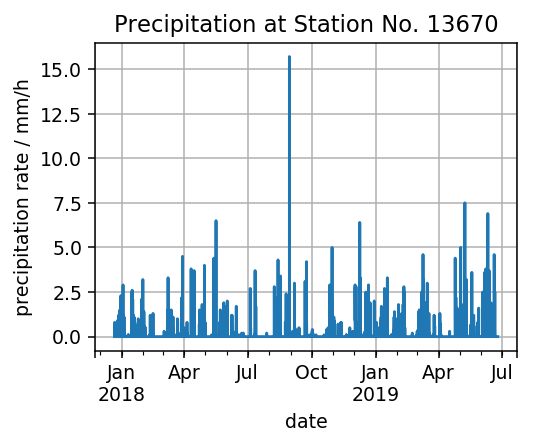

In [36]:
fig = plt.figure(figsize=(4,3),dpi=136)
ax = fig.add_subplot(111)
rr1_df["r1"].plot(ax = ax)
ax.grid(True)
ax.set_title("Precipitation at Station No. 13670")
ax.set_ylabel("precipitation rate / mm/h")
ax.set_xlabel("date")
plt.show()

## Let us read another file and SPEEP UP :-) ##

ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/precipitation/recent/stundenwerte_RR_00989_akt.zip

Let us import it according to what we have done before.

In [37]:
os.listdir("stundenwerte_RR_00989_akt")

['Metadaten_Fehlwerte_Gesamt_00989.html',
 'Metadaten_Fehlwerte_Gesamt_00989.txt',
 'Metadaten_Geographie_00989.txt',
 'Metadaten_Geraete_Niederschlagshoehe_00989.html',
 'Metadaten_Geraete_Niederschlagshoehe_00989.txt',
 'Metadaten_Parameter_rr_stunde_00989.html',
 'Metadaten_Parameter_rr_stunde_00989.txt',
 'Metadaten_Stationsname_00989.html',
 'Metadaten_Stationsname_00989.txt',
 'produkt_rr_stunde_20171222_20190624_00989.txt']

In [38]:
fname2 = "stundenwerte_RR_00989_akt/produkt_rr_stunde_20171222_20190624_00989.txt"

In [39]:
parser = lambda date: pd.datetime.strptime(date, '%Y%m%d%H')

In [40]:
rr2_df = pd.read_csv(fname2, sep = ";" , skiprows = [0], names = new_headers, 
                     parse_dates = ["mess_datum"], date_parser = parser, index_col = "mess_datum")

In [41]:
rr2_df.head()

,stations_id,qn_8,r1,rs_ind,wrtr,eor
mess_datum,,,,,,
2017-12-22 00:00:00,989,3,0.0,0,-999,eor
2017-12-22 01:00:00,989,3,0.0,0,-999,eor
2017-12-22 02:00:00,989,3,0.0,1,-999,eor
2017-12-22 03:00:00,989,3,0.1,1,-999,eor
2017-12-22 04:00:00,989,3,0.1,1,-999,eor


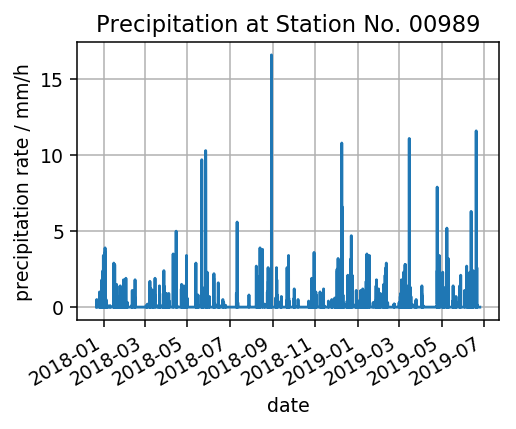

In [43]:
fig = plt.figure(figsize=(4,3),dpi = 136)
ax = fig.add_subplot(111)
rr2_df["r1"].plot(ax = ax)
ax.grid(True)
ax.set_title("Precipitation at Station No. 00989")
ax.set_ylabel("precipitation rate / mm/h")
ax.set_xlabel("date")
plt.show()

### Merge the two times series where the indices match. ###

In [44]:
joined_df = rr1_df.merge(rr2_df, suffixes = ("_S1", "_S2"), left_index=True, right_index=True)
joined_df.head()

,stations_id_S1,mess_datum,qn_8_S1,r1_S1,rs_ind_S1,wrtr_S1,eor_S1,stations_id_S2,qn_8_S2,r1_S2,rs_ind_S2,wrtr_S2,eor_S2
mess_datum,,,,,,,,,,,,,
2017-12-22 00:00:00,13670,2017-12-22 00:00:00,3,0.0,0,-999,eor,989,3,0.0,0,-999,eor
2017-12-22 01:00:00,13670,2017-12-22 01:00:00,3,0.0,0,-999,eor,989,3,0.0,0,-999,eor
2017-12-22 02:00:00,13670,2017-12-22 02:00:00,3,0.0,1,-999,eor,989,3,0.0,1,-999,eor
2017-12-22 03:00:00,13670,2017-12-22 03:00:00,3,0.2,1,-999,eor,989,3,0.1,1,-999,eor
2017-12-22 04:00:00,13670,2017-12-22 04:00:00,3,0.2,1,-999,eor,989,3,0.1,1,-999,eor


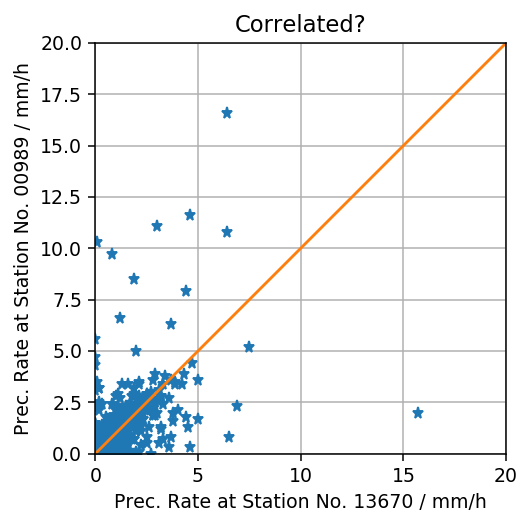

In [55]:
fig = plt.figure(figsize = (4,4),dpi = 136)
ax = fig.add_subplot(111)
ax.plot(joined_df["r1_S1"], joined_df["r1_S2"],"*")
ax.plot([0,20],[0,20])

ax.set_title("Correlated?")
ax.set_xlabel("Prec. Rate at Station No. 13670 / mm/h")
ax.set_ylabel("Prec. Rate at Station No. 00989 / mm/h")

ax.set_aspect('equal', 'box')
ax.axis([0, 20, 0, 20])


ax.grid(True)
plt.show()

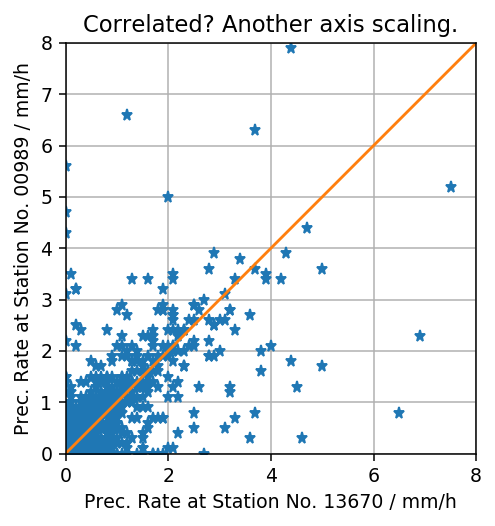

In [56]:
fig = plt.figure(figsize = (4,4), dpi = 136)
ax = fig.add_subplot(111)

ax.plot(joined_df["r1_S1"], joined_df["r1_S2"],"*")
ax.plot([0,20],[0,20])

ax.set_title("Correlated? Another axis scaling.")

ax.set_aspect('equal', 'box')
ax.axis([0, 8, 0, 8])
ax.set_xlabel("Prec. Rate at Station No. 13670 / mm/h")
ax.set_ylabel("Prec. Rate at Station No. 00989 / mm/h")
ax.grid(True)
plt.show()